<a href="https://colab.research.google.com/github/t108368071/MyProject/blob/master/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive 

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/
#df_all = pd.read_csv("NormalBP_features_90000.csv") 
df_all = pd.read_csv("NormalBP_features_13000.csv") 
#df_all = pd.read_csv("HIGHBP_features_13000.csv")
#df_all = pd.read_csv("LOWBP_features_13000.csv")
#df_all = pd.read_csv("MIXBP_features_39000.csv")

#num_features = ['cardiac_period', 'SUT', 'DT', 'DW_10', 'DW_25', 'DW_33', 'DW_50', 'DW_66','DW_75', 'SW_10 + DW_10', 'SW_10/DW_10', 'SW_25 + DW_25', 'SW_25/DW_25', 'SW_33 + DW_33', 'SW_33/DW_33','SW_50 + DW_50', 'SW_50 / DW_50', 'SW_66 + DW_66', 'SW_66 / DW_66','SW_75 + DW_75', 'SW_75 / DW_75','area','area_s','area_d']

#正常特徵
num_features = ['cardiac_period', 'SUT', 'DT','SW_25 + DW_25','SW_75 + DW_75','DW_50','SW_50 + DW_50','area_d']
#num_features = ['area_s','area','SW_10/DW_10','SW_66 + DW_66','SW_10 + DW_10','SW_50 + DW_50','SW_33 + DW_33','SW_33/DW_33']
#num_features = ['SW_25/DW_25','SW_66 / DW_66','DW_75','SW_75 / DW_75','DW_10','DW_33','DW_66','DW_25']

#高血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SW_50 + DW_50','DW_33','SW_33/DW_33','SW_10/DW_10']

#低血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SUT','area','SW_10/DW_10','SW_25/DW_25']

#混和特徵
#num_features = ['cardiac_period','SUT', 'DT','DW_50','SW_75 / DW_75','area_d','DW_75', 'SW_10/DW_10']

target = ['systolic','diastolic']

df = df_all[num_features + target]
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


,cardiac_period,SUT,DT,SW_25 + DW_25,SW_75 + DW_75,DW_50,SW_50 + DW_50,area_d,systolic,diastolic
0,70,17,54,36,15,14,22,0.741239,136.372739,65.402256
1,71,17,53,36,16,14,24,0.712137,122.940610,66.672202
2,70,18,53,36,17,14,24,0.679953,122.110261,66.379138
3,71,17,54,36,16,14,23,0.692348,120.889158,65.060347
4,70,17,53,41,17,15,24,0.711011,119.033082,66.623358


In [ ]:
df_target = pd.DataFrame(df, columns=["systolic", "diastolic"])
df.drop(["systolic", "diastolic"], axis=1, inplace=True)
df_target.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,systolic,diastolic
0,136.372739,65.402256
1,122.940610,66.672202
2,122.110261,66.379138
3,120.889158,65.060347
4,119.033082,66.623358


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3, random_state=3) 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(X_train)
x_test=sc_X.transform(X_test)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=5)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(x_val))

9100
1950
1950


In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=150,  verbose=1, mode='min')
callbacks_list = [earlystop]

def baseline_model():
	# create model
  from keras import optimizers
  model = Sequential()
  model.add(Dense(128, input_dim=8, kernel_initializer='normal', activation='relu'))
  model.add(Dense(256, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(2, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

Epoch 1/500
72/72 [==============================] - 3s 10ms/step - loss: 9121.0095 - val_loss: 1460.5743
Epoch 2/500
72/72 [==============================] - 0s 3ms/step - loss: 923.4538 - val_loss: 349.5756
Epoch 3/500
72/72 [==============================] - 0s 4ms/step - loss: 323.4073 - val_loss: 177.8922
Epoch 4/500
72/72 [==============================] - 0s 3ms/step - loss: 182.3093 - val_loss: 115.7946
Epoch 5/500
72/72 [==============================] - 0s 3ms/step - loss: 130.8317 - val_loss: 90.4264
Epoch 6/500
72/72 [==============================] - 0s 3ms/step - loss: 108.4511 - val_loss: 80.9657
Epoch 7/500
72/72 [==============================] - 0s 4ms/step - loss: 104.0749 - val_loss: 75.0190
Epoch 8/500
72/72 [==============================] - 0s 3ms/step - loss: 97.2636 - val_loss: 71.8544
Epoch 9/500
72/72 [==============================] - 0s 3ms/step - loss: 94.5660 - val_loss: 70.4232
Epoch 10/500
72/72 [==============================] - 0s 3ms/step - loss: 93.

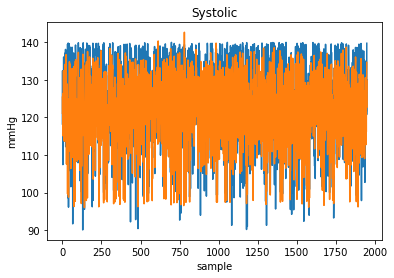

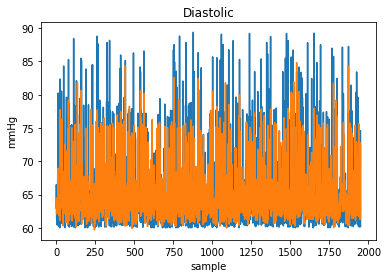

In [ ]:
from sklearn.metrics import mean_absolute_error
estimator = KerasRegressor(build_fn=baseline_model, epochs=500, batch_size=128, verbose=1)
history = estimator.fit(x_train, y_train, validation_data=(x_val,y_val),callbacks=callbacks_list)
prediction = estimator.predict(x_test)

error_sbp = prediction[:,0] - y_test["systolic"].values
error_dbp = prediction[:,1] - y_test["diastolic"].values

mae_error_sbp = mean_absolute_error(prediction[:,0],y_test["systolic"].values)
mae_error_dbp = mean_absolute_error(prediction[:,1],y_test["diastolic"].values)

error_sbp_std = np.std(abs(prediction[:,0] - y_test["systolic"].values))
error_dbp_std = np.std(abs(prediction[:,1] - y_test["diastolic"].values))

print(f"MAE SBP: {mae_error_sbp} SD:{error_sbp_std} MAE DBP: {mae_error_dbp} SD:{error_dbp_std}")

sbp = np.vstack(y_test["systolic"])
dbp = np.vstack(y_test["diastolic"])
prd_sbp = np.vstack(prediction[:,0])
prd_dbp = np.vstack(prediction[:,1])

plt.figure(1)
plt.title("Systolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(sbp)
plt.plot(prd_sbp)

plt.figure(2)
plt.title("Diastolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(dbp)
plt.plot(prd_dbp)


#np.savetxt('ANN_nor_24_9w_result.csv',np.column_stack((sbp,dbp,prd_sbp,prd_dbp,error_sbp,error_dbp)),delimiter=',')

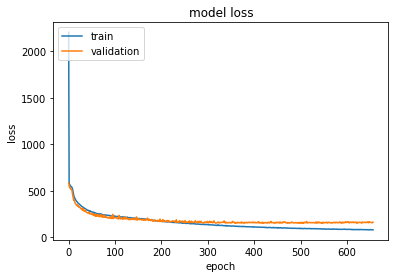

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()